In [1]:
import os
import sys
from util import get_buckets

import numpy as np
import time
import ujson as json

%matplotlib inline
import random
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd 

In [2]:
with open('/Users/fan/Documents/Research/mul-hop-viz/experiments/hotpotcollector-backend/data/hotpot_train_v1.1_coref_flattened.json') as json_file:      
    data = json_file.readlines()
    data = list(map(json.loads, data)) 
question_df = pd.DataFrame(data[0])
del data
import gc
gc.collect()

0

In [3]:
pd.set_option('display.max_colwidth', None)    # display full (non-truncated) column
question_df.head(3)

supporting_facts  \
0                                       [[Arthur's Magazine, 0], [First for Women, 0]]   
1                                          [[Oberoi family, 0], [The Oberoi Group, 0]]   
2  [[Allie Goertz, 0], [Allie Goertz, 1], [Allie Goertz, 2], [Milhouse Van Houten, 0]]   

    level  \
0  medium   
1  medium   
2    hard   

                                                                                                                          question  \
0                                                           Which magazine was started first Arthur's Magazine or First for Women?   
1                                                The Oberoi family is part of a hotel company that has a head office in what city?   
2  Musician and satirist Allie Goertz wrote a song about the "The Simpsons" character Milhouse, who Matt Groening named after who?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### Statistics

In [21]:
question_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90447 entries, 0 to 90446
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   supporting_facts            90447 non-null  object
 1   level                       90447 non-null  object
 2   question                    90447 non-null  object
 3   context                     90447 non-null  object
 4   answer                      90447 non-null  object
 5   _id                         90447 non-null  object
 6   type                        90447 non-null  object
 7   corefed_context             90447 non-null  object
 8   numbered_context            90447 non-null  object
 9   numbered_supporting_facts   90447 non-null  object
 10  numbered_context_flattened  90447 non-null  object
dtypes: object(11)
memory usage: 7.6+ MB


#### level

In [22]:
# Distribution of difficulty levels
grouped = question_df.groupby(['level'])
level_counts = grouped.size()  # count of each 
level_counts

level
easy      17972
hard      15661
medium    56814
dtype: int64

#### type

In [20]:
question_df.type.describe()

count      90447
unique         2
top       bridge
freq       72991
Name: type, dtype: object

In [64]:
# Distribution of type
grouped = question_df.groupby(['type'])
type_counts = grouped.size()  # count of each 
type_counts

type
bridge        72991
comparison    17456
dtype: int64

#### context 

In [18]:
question_df.numbered_context_flattened.str.len().describe()  # statistic of number of context sentences

count    90447.000000
mean        40.944907
std         11.207428
min          2.000000
25%         34.000000
50%         40.000000
75%         47.000000
max        144.000000
Name: numbered_context_flattened, dtype: float64

In [20]:
grouped = question_df.groupby(question_df.numbered_context_flattened.str.len())
num_of_context_sentences = grouped.size()  # count of each 
num_of_context_sentences

numbered_context_flattened
2       8
3      36
4      51
5      52
6      57
       ..
133     2
134     1
136     4
142     1
144     2
Length: 134, dtype: int64

In [53]:
num_of_context_sentences.max()

3788

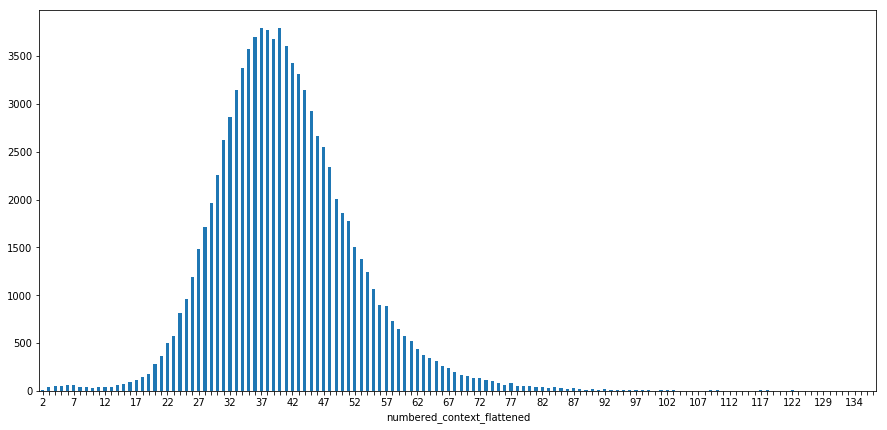

In [56]:
# distribution of number of context sentences
plot = num_of_context_sentences.plot(kind = 'bar', figsize=(15, 7))
plt.xticks(rotation=0)                                    # show label text horizontally
plt.setp(plot.axes.get_xticklabels(), visible=False)      # hide all labels
plt.setp(plot.axes.get_xticklabels()[::5], visible=True)  # set every 5 labels visible
plt.show() 

#### answer

In [15]:
question_df.answer.str.split(' ').str.len().describe()  # statistic of number of words in the answer

count    90447.000000
mean         2.226287
std          1.809021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         89.000000
Name: answer, dtype: float64

In [17]:
grouped = question_df.groupby(question_df.answer.str.split(' ').str.len())
num_of_answer_words = grouped.size()  # count of each 
num_of_answer_words

answer
1     31945
2     31202
3     16994
4      5523
5      2562
6       836
7       413
8       228
9       117
10       91
11       80
12       61
13       51
14       42
15       29
16       41
17       38
18       19
19       23
20       20
21       19
22       14
23       10
24       14
25       13
26        8
27        7
28       11
29        5
30        3
31        2
32        6
33        2
34        4
35        3
36        1
38        2
39        1
40        2
44        1
46        1
65        1
81        1
89        1
dtype: int64

In [60]:
# number of questions with answer 'yes'
question_df.loc[question_df['answer'] == 'yes'].shape[0]

2748

In [69]:
# number of comparison questions with answer 'yes'
question_df.loc[(question_df['answer'] == 'yes') & (question_df['type'] == 'comparison')].shape[0]

2748

In [61]:
# number of questions with answer 'no'
question_df.loc[question_df['answer'] == 'no'].shape[0]

2733

In [67]:
# number of comparison questions with answer 'no'
question_df.loc[(question_df['answer'] == 'no') & (question_df['type'] == 'comparison')].shape[0]

2733

In [62]:
# numer of questions with a span answer
question_df.loc[(question_df['answer'] != 'yes') & (question_df['answer'] != 'no')].shape[0]

84966

questions with answer yes/no are all comparison questions, and (17456-2733-2748) = 68.6% comparison questions have span answers 

#### supporting facts

In [8]:
# add a column to count the number of supporting facts
question_df['num_of_supporting_facts'] = question_df.numbered_supporting_facts.str.len()

In [79]:
# Distribution of number of supporting facts
question_df.num_of_supporting_facts.describe()

count    90447.000000
mean         2.384402
std          0.672601
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         12.000000
Name: num_of_supporting_facts, dtype: float64

In [77]:
# Distribution of number of supporting facts
grouped = question_df.groupby(['num_of_supporting_facts'])
num_of_supporting_facts_counts = grouped.size()  # count of each 
num_of_supporting_facts_counts

num_of_supporting_facts
2     63685
3     20019
4      5805
5       722
6       141
7        52
8        17
9         4
11        1
12        1
dtype: int64

In [78]:
# check thoese questions with more than 8 supportiing facts
question_df.loc[question_df.num_of_supporting_facts > 8]

supporting_facts  \
1722                                                                   [[Kazuo Ishiguro, 0], [Kazuo Ishiguro, 1], [Kazuo Ishiguro, 2], [Yukio Mishima, 0], [Yukio Mishima, 1], [Yukio Mishima, 2], [Yukio Mishima, 3], [Yukio Mishima, 4], [Yukio Mishima, 5], [Yukio Mishima, 6], [Yukio Mishima, 7], [Yukio Mishima, 8]]   
2061   [[Margaret MacDonald (visionary), 3], [Margaret MacDonald (visionary), 4], [Margaret MacDonald (visionary), 5], [Margaret MacDonald (visionary), 6], [Margaret MacDonald (visionary), 7], [Margaret MacDonald (visionary), 8], [Margaret MacDonald (visionary), 9], [John Nelson Darby, 0], [John Nelson Darby, 2]]   
11275                                                                                                                                      [[Rowland Brown, 0], [Rowland Brown, 1], [Rowland Brown, 2], [Rowland Brown, 3], [Mike Nichols, 0], [Mike Nichols, 1], [Mike Nichols, 2], [Mike Nichols, 3], [Mike Nichols, 4]]   
55922                                                                      [[Mental Floss, 0], [Mental Floss, 1], [Mental Floss, 2], [Mental Floss, 3], [Mental Floss, 4], [Mental Floss, 5], [Dr. Dobb's Journal, 0], [Dr. Dobb's Journal, 1], [Dr. Dobb's Journal, 2], [Dr. Dobb's Journal, 3], [Dr. Dobb's Journal, 4]]   
61537                                                    [[The Final Solution (novel), 0], [The Final Solution (novel), 1], [The Final Solution (novel), 2], [The Final Solution (novel), 3], [Professor Moriarty, 0], [Professor Moriarty, 1], [Professor Moriarty, 2], [Professor Moriarty, 3], [Professor Moriarty, 4]]   
72623                                         [[Too Weird to Live, Too Rare to Die!, 0], [Too Weird to Live, Too Rare to Die!, 1], [Too Weird to Live, Too Rare to Die!, 2], [Too Weird to Live, Too Rare to Die!, 3], [Dallon Weekes, 0], [Dallon Weekes, 1], [Dallon Weekes, 2], [Dallon Weekes, 3], [Dallon Weekes, 4]]   

        level  \
1722   medium   
2061     hard   
11275  medium   
55922    easy   
61537    hard   
72623    hard   

                                                                                                                                                                                                              question  \
1722                                                                                                                                             Did Kazuo Ishiguro and Yukio Mishima both move from Japan to England?   
2061   Apart from the founder of the Exclusive Brethren, what is the name of the second person who was sent by the Plymouth Brethren to investigate the outbreak of supernatural gifts of the Holy Spirit in Scotland?   
11275                                                                                                                                                       Who won more Grammy Awards, Mike Nichols or Rowland Brown?   
55922                                                                                                                                      Is the Mental Floss paragraph related to the Dr. Dobb's Journal paragraph?    
61537                                                                                               The Final Solution pays homage to a series where Sherlock Holmes calls his later archenemy the "Napoleon" of what?   
72623                                                               What was the name of the drummer on the Panic at The Disco album where the former lead vocalist (among other titles) for the Brobecks played bass?   

                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [100]:
# add a column: supporting fact text
question_df['supporting_fact_text'] = question_df.apply(lambda row: [row['numbered_context_flattened'][f-1][1] for f in row['numbered_supporting_facts']], axis = 1)

In [101]:
question_df.head(3)

supporting_facts  \
0                                       [[Arthur's Magazine, 0], [First for Women, 0]]   
1                                          [[Oberoi family, 0], [The Oberoi Group, 0]]   
2  [[Allie Goertz, 0], [Allie Goertz, 1], [Allie Goertz, 2], [Milhouse Van Houten, 0]]   

    level  \
0  medium   
1  medium   
2    hard   

                                                                                                                          question  \
0                                                           Which magazine was started first Arthur's Magazine or First for Women?   
1                                                The Oberoi family is part of a hotel company that has a head office in what city?   
2  Musician and satirist Allie Goertz wrote a song about the "The Simpsons" character Milhouse, who Matt Groening named after who?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [181]:
# add a column: whether each supporting fact contains the answer string or not
import re
import string
def findWholeWord(w):
    return re.compile(r'\b({0})\b'.format(re.escape(w.strip(string.punctuation))), flags=re.IGNORECASE).search
    # strip(string.punctuation) to remove heading and ending punctuations in the answer, otherwise can not found correctly if heading or ending punctuations appears

question_df['supporting_fact_contain_answer'] = question_df.apply(lambda row: [ findWholeWord(row['answer'])(f) is not None for f in row['supporting_fact_text']], axis = 1)
question_df['supporting_fact_contain_answer']

0                      [True, False]
1                      [False, True]
2        [False, False, False, True]
3               [True, False, False]
4                       [True, True]
                    ...             
90442                  [False, True]
90443            [False, True, True]
90444                  [False, True]
90445                   [True, True]
90446            [False, True, True]
Name: supporting_fact_contain_answer, Length: 90447, dtype: object

In [172]:
question_df.head(3)

supporting_facts  \
0                                       [[Arthur's Magazine, 0], [First for Women, 0]]   
1                                          [[Oberoi family, 0], [The Oberoi Group, 0]]   
2  [[Allie Goertz, 0], [Allie Goertz, 1], [Allie Goertz, 2], [Milhouse Van Houten, 0]]   

    level  \
0  medium   
1  medium   
2    hard   

                                                                                                                          question  \
0                                                           Which magazine was started first Arthur's Magazine or First for Women?   
1                                                The Oberoi family is part of a hotel company that has a head office in what city?   
2  Musician and satirist Allie Goertz wrote a song about the "The Simpsons" character Milhouse, who Matt Groening named after who?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [182]:
# questions that none of its supporting facts contains the answer string
# that is, rows that question_df['supporting_fact_contain_answer'] is a list of false
question_df[question_df['supporting_fact_contain_answer'].map(lambda x: not(any(x)))] 

supporting_facts  \
27                                [[Pavel Urysohn, 0], [Leonid Levin, 0]]   
28                       [[The New Pornographers, 0], [Kings of Leon, 0]]   
32                           [[Jane (magazine), 0], [First for Women, 0]]   
49                           [[Gin and tonic, 0], [Paloma (cocktail), 0]]   
67                                [[Tim McIlrath, 0], [Spike Slawson, 0]]   
...                                                                   ...   
90388  [[Philippe Perrin, 0], [Umberto Guidoni, 0], [Umberto Guidoni, 1]]   
90404                  [[Patrick McCabe (novelist), 0], [John Braine, 0]]   
90430                             [[Chris Marker, 0], [Yvonne Rainer, 0]]   
90434                                       [[Aglaia, 0], [Valeriana, 0]]   
90437                        [[Fraxinus, 0], [Fraxinus, 2], [Onoclea, 0]]   

        level  \
27     medium   
28       hard   
32     medium   
49     medium   
67     medium   
...       ...   
90388  medium   
90404  medium   
90430  medium   
90434    easy   
90437  medium   

                                                                                     question  \
27                       Were Pavel Urysohn and Leonid Levin known for the same type of work?   
28                      Are both The New Pornographers and Kings of Leon American rock bands?   
32                                       Are Jane and First for Women both women's magazines?   
49                              Are Gin and tonic and Paloma both cocktails based on tequila?   
67                      Are both Tim McIlrath and Spike Slawson American punk rock musicians?   
...                                                                                       ...   
90388                     Are both Philippe Perrin and Umberto Guidoni considered astronauts?   
90404                            Were Patrick McCabe and John Braine of the same nationality?   
90430                                            Are Chris Marker and Yvonne Rainer American?   
90434  Does Aglaia belongs to Mahogany family and Valeriana belongs to Caprifoliaceae family?   
90437                                Can Fraxinus and Onoclea both be found in North America?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

According to the results, there are 5766 such questions that the answer string is not in any of the supporting facts.

In [183]:
# questions that none of its supporting facts contains the answer string, and its answer is neither 'yes' nor 'no'
question_df.loc[question_df['supporting_fact_contain_answer'].map(lambda x: not(any(x))) & (question_df['answer'] != 'yes') & (question_df['answer'] != 'no') ] 

supporting_facts  \
596                                             [[Life Goes On (Fergie song), 2], [M.I.L.F. $, 1]]   
614                                               [[A Thousand Times a Day, 1], [George Jones, 1]]   
719                                                           [[Jang Hoon, 0], [A Taxi Driver, 2]]   
970    [[Peace Palace Library, 0], [Peace Palace Library, 1], [International Court of Justice, 0]]   
1019                                                          [[Sarfraz Ahmed, 3], [Azhar Ali, 1]]   
...                                                                                            ...   
89376                                             [[Gioachino Rossini, 0], [Emmanuel Chabrier, 1]]   
89455                     [[Park Kwang-hyun, 0], [Park Kwang-hyun, 1], [Welcome to Dongmakgol, 0]]   
89869        [[2011 Kansas State Wildcats football team, 4], [2011 Baylor Bears football team, 2]]   
90082                                                [[Steven Levenson, 1], [Dear Evan Hansen, 0]]   
90347                                             [[Saint Vitus (band), 1], [Pentagram (band), 0]]   

        level  \
596      easy   
614      hard   
719    medium   
970      easy   
1019     easy   
...       ...   
89376  medium   
89455    easy   
89869    easy   
90082    easy   
90347    hard   

                                                                                                                     question  \
596                               What song recorded by Fergie was produced by Polow da Don and was followed by Life Goes On?   
614                      What is the best known song of the artist who originally recorded the song "A Thousand Times a Day"?   
719                                                                                Where was the film A Taxi Driver released?   
970                                                                                Where is the Peace Palace Library located?   
1019                                                                  Whar did Sarfraz Ahmed do after Azhar Ali stepped down?   
...                                                                                                                       ...   
89376                                                  Gioachino Rossini and Emmanuel Chabrier both wrote what type of music?   
89455  From which country hails the film director, who co-wrote 'Welcome to Dongmakgol' the 2005 critical and commercial hit?   
89869                                                                    The bears and the wildcats are both members of what?   
90082                                                                     What award did Steven Levenson win for his musical?   
90347                                        Saint Vitus and Pentagram had what in common when it came to the music industry?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

According to the results, there are only 328 questions that the answer string is not in any of the supporting facts and the answer is neither 'yes' nor 'no'. <br> In many of the case, the answer does not in the supporting facts as whole words because its correfrence is not resolved, that is, the answer contains pronoun <br>
Other cases: <br>
- answer is 'opera', supporting facts contain 'operas'
- answer is 'South Korea', supporting facts contain 'South Korean' 

Whole word match was used on purpose, because answer can be substring of an irrelevant word. For example, answer is 'yes', and supporting facts contain 'John Henry No**yes** Collier'

In [185]:

question_df.loc[question_df['supporting_fact_contain_answer'].map(lambda x: (any(x))) & (question_df['answer'] == 'no') ] 

supporting_facts  \
3217                                       [[Irving Wallace, 0], [Muriel Spark, 0], [Muriel Spark, 1]]   
4627                                                    [[Diet Pepsi, 0], [Volvic (mineral water), 0]]   
7049                                                       [[Ihor Podolchak, 0], [Roger Donaldson, 0]]   
13699              [[Grand Bleu de Gascogne, 0], [Grand Bleu de Gascogne, 1], [Norwegian Elkhound, 4]]   
15820                                                 [[Griffon Bleu de Gascogne, 0], [Leonberger, 1]]   
16731                                                        [[Garbiñe Muguruza, 0], [Kim Warwick, 0]]   
24206                                                        [[Spin Doctors, 0], [The Stone Roses, 0]]   
24483                  [[Ketchikan International Airport, 0], [Southwest Georgia Regional Airport, 0]]   
34368                                                          [[Skye Sweetnam, 0], [Spin Doctors, 0]]   
34881                                                         [[Brian Gottfried, 0], [Andy Murray, 0]]   
36940                                               [[Holland's Magazine, 0], [Darling (magazine), 0]]   
39704                                                        [[František Čermák, 2], [Horia Tecău, 0]]   
41810                                                        [[Arenaria (plant), 0], [Sciadopitys, 1]]   
42648                                          [[Stichelhaar, 0], [Chien Français Blanc et Orange, 0]]   
44047                                                      [[Sandon Stolle, 0], [Elizabeth Smylie, 0]]   
46831                                                   [[Robert Lindstedt, 0], [Billie Jean King, 0]]   
48554                                    [[Westphalian Dachsbracke, 0], [Australian Silky Terrier, 1]]   
48569                                                        [[Corina Morariu, 0], [Mats Wilander, 0]]   
51659                                                           [[Ilie Năstase, 0], [Nikola Pilić, 0]]   
52287                                                       [[Pharaoh Hound, 0], [German Pinscher, 0]]   
55277                                                        [[Martina Hingis, 0], [Michael Chang, 0]]   
56074                                                                  [[Karsk, 0], [BLT cocktail, 0]]   
58919                                                            [[Lukáš Dlouhý, 0], [Andy Murray, 0]]   
61660                                                               [[The La's, 0], [Spin Doctors, 0]]   
62322                                [[Jim Pugh, 0], [Jim Pugh, 1], [Jim Pugh, 2], [Murphy Jensen, 2]]   
62346  [[Sinhala Hound, 0], [Sinhala Hound, 1], [Sinhala Hound, 2], [Chien Français Blanc et Noir, 0]]   
64600                                                                    [[Julmust, 0], [Lucozade, 0]]   
69723                                                          [[Xavier Malisse, 0], [Jim Courier, 0]]   
70287                                                     [[The Gaslight Anthem, 0], [No Devotion, 0]]   
72951                           [[Tucson International Airport, 0], [Juneau International Airport, 0]]   
73094                                                       [[Lucie Hradecká, 0], [Jonas Björkman, 0]]   
77343                                [[ASOS.com, 0], [Darling (magazine), 0], [Darling (magazine), 3]]   
77735                                                                   [[Li Na, 0], [Matt Lucena, 0]]   
80035                                                         [[Horia Tecău, 0], [Heinz Günthardt, 0]]   
80533                                              [[Miranda v. Arizona, 0], [Georgia v. Randolph, 0]]   
80549                                                       [[Fabio Fognini, 0], [Brian Gottfried, 0]]   
82311                  [[Curtis Publishing Co. v. Butts, 0], [Ware v. Hylton, 0], [Ware v. Hylton, 1]]   
86143                                                     

There are several cases the answer 'no' appears in supporting facts. But mostly appears as 'No.', an abbreviation of number.  

In [189]:
# how many supporting facts contains the answer string, that is, the count of 'True'
question_df['supporting_fact_contain_answer'].map(lambda x: sum(x)).describe()

count    90447.000000
mean         1.206165
std          0.576584
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: supporting_fact_contain_answer, dtype: float64

In [190]:
grouped = question_df.groupby(question_df['supporting_fact_contain_answer'].map(lambda x: sum(x)))
num_of_supporting_fact_contain_answer = grouped.size()  # count of each 
num_of_supporting_fact_contain_answer

supporting_fact_contain_answer
0     5766
1    61929
2    21249
3     1382
4       93
5       21
6        5
7        2
dtype: int64

In [191]:
# check thoese questions with more than 5 supportiing facts contain the answer
question_df.loc[question_df['supporting_fact_contain_answer'].map(lambda x: sum(x)) > 5]

supporting_facts  \
18114  [[Hot Stuff (Let's Dance), 0], [Hot Stuff (Let's Dance), 1], [Kano (rapper), 0], [Kano (rapper), 1], [Kano (rapper), 2], [Kano (rapper), 3], [Kano (rapper), 4], [Kano (rapper), 5]]   
21368                 [[Steve Smith (US high jumper), 0], [Steve Smith (US high jumper), 1], [Indianapolis, 0], [Indianapolis, 1], [Indianapolis, 2], [Indianapolis, 3], [Indianapolis, 4]]   
21735                  [[If You've Got Trouble, 1], [If You've Got Trouble, 2], [If You've Got Trouble, 4], [Help! (album), 0], [Help! (album), 1], [Help! (album), 3], [Help! (album), 4]]   
37074                     [[1936 NFL Championship Game, 0], [1936 NFL Championship Game, 1], [Polo Grounds, 0], [Polo Grounds, 1], [Polo Grounds, 2], [Polo Grounds, 3], [Polo Grounds, 4]]   
42377                                                                                    [[Niki Juusela, 3], [Niki Juusela, 4], [Football, 0], [Football, 1], [Football, 2], [Football, 3]]   
42899  [[Adavi Ramudu (2004 film), 1], [Adavi Ramudu (2004 film), 2], [Adavi Ramudu (2004 film), 4], [Adavi Ramudu (2004 film), 6], [Prabhas, 0], [Prabhas, 1], [Prabhas, 3], [Prabhas, 4]]   
87878                                                                  [[Gos Rater Valencià, 1], [Briard, 0], [Briard, 1], [Briard, 2], [Briard, 3], [Briard, 4], [Briard, 5], [Briard, 6]]   

        level  \
18114    easy   
21368  medium   
21735  medium   
37074  medium   
42377  medium   
42899  medium   
87878  medium   

                                                                                                                                                                                                                                                                            question  \
18114  "Hot Stuff (Let's Dance)" is a song by British singer Craig David, it was released in November 2007 as the second single from his fourth album "Trust Me", following the single "This Is the Girl" with which English rapper and actor from East Ham, London, better know as?   
21368                                                                                                                                            What city is in the East North Central region of the Midwestern United States and the birthplace of an American former high jumper?   
21735                                                                                                                                                                       What album produced by George Martin was supposed to contain a song that ended up unreleased until 1996?   
37074                                                                                                                                                                                       This place, leased to the New York Metropolitan in 1880, also held a neautral NFL game.    
42377                                                                                                                                      Niki Juusela has commentary for what family of team sports that involve, to varying degrees, kicking a ball with the foot to score a goal   
42899                                                                                                                                                                           Who is the actor who appeared in the Hindi action movies "The Strongman Badal" and "Action Jackson"?   
87878                                                                                                                                                                                       Which breed of dog has a longer history competing in shows, Gos Rater Valencià or Briard   

                                                                                                                                                                                                                                                                        

### Ranking

#### Sentences Similarity

##### sklearn

###### TF-IDF 

##### glove embedding

##### flair embedding

##### transformer embedding

#### Longformer

In [23]:
>>> from transformers import LongformerTokenizer, LongformerForQuestionAnswering
>>> import torch

>>> tokenizer = LongformerTokenizer.from_pretrained("allenai/longformer-large-4096-finetuned-triviaqa")
>>> model = LongformerForQuestionAnswering.from_pretrained("allenai/longformer-large-4096-finetuned-triviaqa")

In [3]:
#!python -m pip install flair
from typing import List
from torch.utils.data import Dataset
import torch
from flair.data import Sentence, Corpus
from flair.embeddings import DocumentRNNEmbeddings, BertEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
import time
import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

In [5]:
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize

In [6]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
